<a href="https://colab.research.google.com/github/Hashhhhhhhh/ML-with-Python/blob/main/Applying_CNN_to_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taking an image and applying convolutional layer, activation layer, and pooling layer operations to extract the inside features:

1. Importing libraries
2. Setting the parameters
3. Defining the kernel
4. Loading the image and plotting it
5. Reformating the image
6. Applying convolutional layer and plotting the output image
7. Applying activation layer and plotting the output image
8. Applying pooling layer and plotting the output image

In [4]:
#importing libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product


In [6]:
#setting parameters
plt.rc('figure',autolayout=True)
plt.rc('image',cmap='magma')

In [7]:
#Defining kernel
kernel = tf.constant([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1],
                   ])

In [12]:
image = tf.io.read_file('/content/Pranav for cnn.jpg') #to read the image as sequence of bytes
#the following codde is to decodes the raw bytes into a TensorFlow tensor (an array) representing the image.
image = tf.io.decode_jpeg(image, channels=1) #channels=1 means the image will be loaded in grayscale (single channel), even if the original image is colored.
image = tf.image.resize(image, size=[500, 500]) #This resizes the image tensor to 500 pixels by 500 pixels
print(image)

tf.Tensor(
[[[20.      ]
  [20.      ]
  [20.791   ]
  ...
  [22.918488]
  [23.      ]
  [23.      ]]

 [[19.373001]
  [19.895918]
  [20.      ]
  ...
  [21.982986]
  [22.373001]
  [22.373001]]

 [[18.233   ]
  [18.955   ]
  [19.39    ]
  ...
  [20.582537]
  [20.955   ]
  [20.955   ]]

 ...

 [[11.476478]
  [11.592969]
  [18.857368]
  ...
  [22.      ]
  [23.166016]
  [24.      ]]

 [[20.327633]
  [29.097097]
  [39.936424]
  ...
  [22.      ]
  [23.166016]
  [24.      ]]

 [[32.0738  ]
  [47.11885 ]
  [55.402637]
  ...
  [22.      ]
  [23.166016]
  [24.      ]]], shape=(500, 500, 1), dtype=float32)


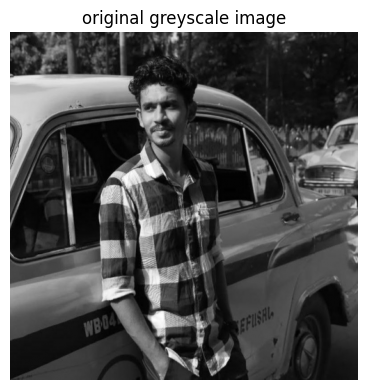

In [25]:
#Plotting the image
img=tf.squeeze(image).numpy() #to squeeze out the extra unnecessary dimensions
plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title("original greyscale image")
plt.show()


When working with images in TensorFlow, most functions—especially those related to deep learning, like convolutional layers—expect the input to be a batch of images, not just a single image. A batch is simply a group of images processed together at the same time. For example, if you have a batch size of 32, you process 32 images in one go. The input tensor for a batch of images typically has the shape (batch_size, height, width, channels). Even if you only have one image, TensorFlow still expects that extra "batch" dimension, so the shape should be (1, height, width, channels). This is why you use tf.expand_dims(image, axis=0): it adds that batch dimension, turning your single image into a batch of one image.


Also, For displaying images with Matplotlib’s imshow, the image data should have one of the following shapes, depending on the type of image:

Grayscale image:
Shape: (height, width)
Example: (300, 300)

RGB image:
Shape: (height, width, 3)
Example: (300, 300, 3)

RGBA image (with alpha channel):
Shape: (height, width, 4)
Example: (300, 300, 4)

Do not include a batch dimension (like (1, height, width, channels)) when using imshow.

For grayscale images, you can also use (height, width, 1), but it’s better to squeeze it to (height, width)

This is what was done in the previous step.

In [33]:
#Reformatting the image

#the following code converts the pixel values between 0 and 1 float values
#if your image was originally in uint8 (values 0–255), after this operation, the pixel values will be floats between 0 and 1.
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image=tf.expand_dims(image, axis=0)
print(image.shape)
#converting the dimensions of the kernel as per tensorflow's needs(4x4)
kernel=tf.reshape(kernel, [*kernel.shape, 1, 1])
print(kernel.shape)
#converting the type of the elements of the kernel to float which tensorflow uses by default
kernel=tf.cast(kernel,dtype=tf.float32)
print(kernel)


(1, 1, 1, 1, 1, 1, 1, 1, 500, 500, 1)
(3, 3, 1, 1, 1, 1, 1, 1, 1, 1)
tf.Tensor(
[[[[[[[[[[-1.]]]]]]]]







  [[[[[[[[-1.]]]]]]]]







  [[[[[[[[-1.]]]]]]]]]








 [[[[[[[[[-1.]]]]]]]]







  [[[[[[[[ 8.]]]]]]]]







  [[[[[[[[-1.]]]]]]]]]








 [[[[[[[[[-1.]]]]]]]]







  [[[[[[[[-1.]]]]]]]]







  [[[[[[[[-1.]]]]]]]]]], shape=(3, 3, 1, 1, 1, 1, 1, 1, 1, 1), dtype=float32)


(1, 1, 1, 1, 1, 1, 1, 1, 500, 500, 1)


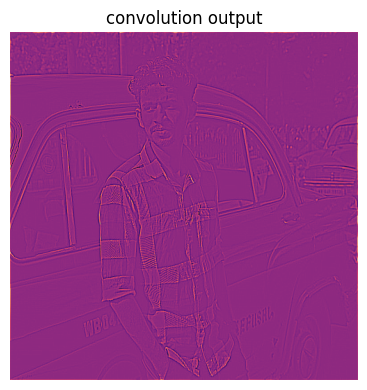

In [38]:
#Applying convolutional layer
kernel=tf.reshape(kernel, [3, 3, 1, 1])
conv_f=tf.nn.conv2d(input=image, filters=kernel, strides=1, padding='SAME')
print(conv_f.shape)
#Plotting this image
plt.figure(figsize=(4,4))
plt.imshow(tf.squeeze(conv_f))
plt.axis('off')
plt.title("convolution output")
plt.show()

(1, 1, 1, 1, 1, 1, 1, 1, 500, 500, 1)


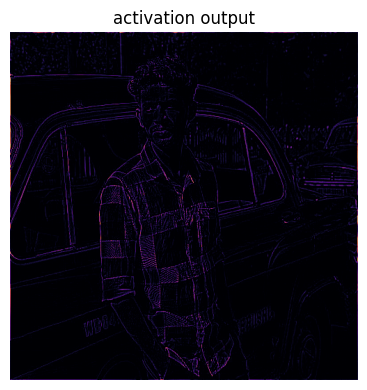

In [51]:
#Activation layer
relu_f=tf.nn.relu(conv_f)
print(relu_f.shape)
relu_img=tf.squeeze(relu_f).numpy()
plt.figure(figsize=(4,4))
plt.imshow(relu_img)
plt.axis('off')
plt.title("activation output")
plt.show()

Make sure your input to pooling is 4D: (batch, height, width, channels). Remove extra dimensions before pooling

In [59]:
relu_f = tf.squeeze(relu_f)  # Remove extra dimensions if needed
relu_f = tf.expand_dims(relu_f, axis=0)  # Add batch dimension
relu_f = tf.expand_dims(relu_f, axis=-1) # Add channel dimension if missing
# Now relu_f should be (1, height, width, 1)
#Applying pooling layer
image_condense = tf.nn.pool(
    input=relu_f,
    window_shape=(2, 2),
    pooling_type='MAX',
    strides=(2, 2),
    padding='SAME'
)


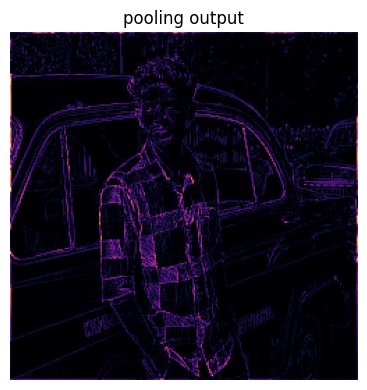

In [60]:
pool_img=tf.squeeze(image_condense).numpy()
plt.figure(figsize=(4,4))
plt.imshow(pool_img)
plt.axis('off')
plt.title("pooling output")
plt.show()